In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from xgboost import XGBClassifier

sns.set_theme(style="whitegrid")


In [ ]:
df = pd.read_csv("dataset_traffic_accident_prediction1.csv")

df = df[df["Accident_Severity"].notna()]

severity_map = {"Low": 0, "Moderate": 1, "High": 2}
df["Accident_Severity"] = df["Accident_Severity"].map(severity_map)

df = df.drop(["Accident", "Driver_Age", "Driver_Experience"], axis=1, errors="ignore")

for col in df.select_dtypes(include="number").columns:
    df[col] = df[col].fillna(df[col].median())

df = df.dropna()

print("✅ Cleaned Class Distribution:")
print(df["Accident_Severity"].value_counts())


✅ Cleaned Class Distribution:
Accident_Severity
0    344
1    175
2     68
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_8496\1172723777.py:7: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


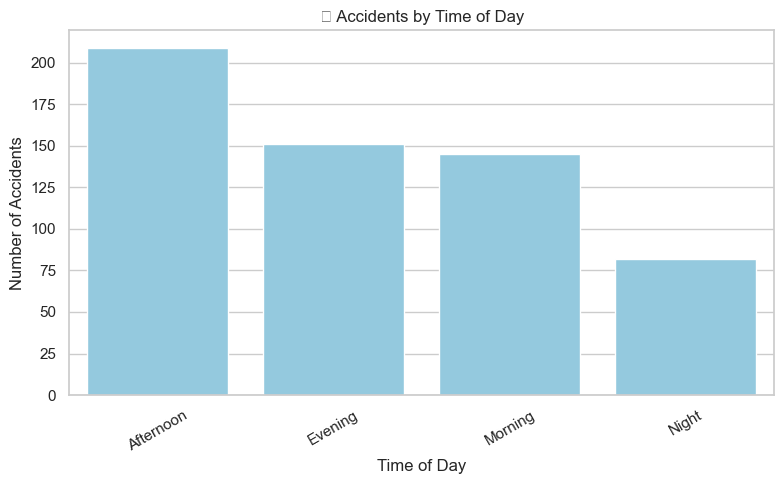

In [161]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time_of_Day', order=df['Time_of_Day'].value_counts().index, color='skyblue')
plt.title("⏰ Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_8496\2881129676.py:10: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_8496\2881129676.py:10: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


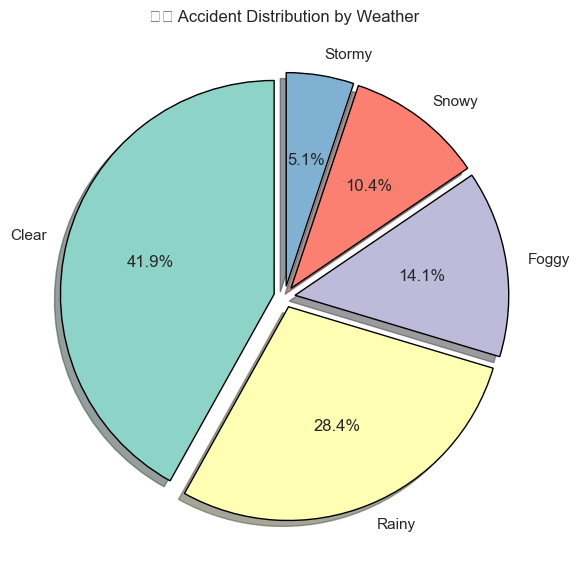

In [162]:
plt.figure(figsize=(6,6))
df['Weather'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90,
    colors=sns.color_palette("Set3"),
    explode=[0.05]*df['Weather'].nunique(),
    shadow=True, wedgeprops={'edgecolor': 'black'}
)
plt.title("🌦️ Accident Distribution by Weather")
plt.ylabel("")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_8496\2950967982.py:4: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


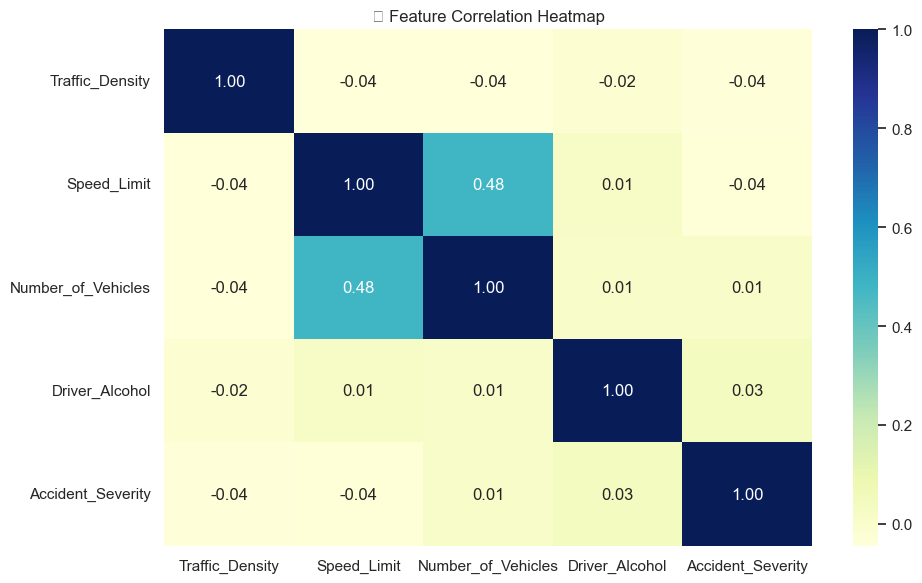

In [163]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("🔥 Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_8496\4003525677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Road_Type', order=df['Road_Type'].value_counts().index, palette='pastel')
C:\Users\hp\AppData\Local\Temp\ipykernel_8496\4003525677.py:7: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_8496\4003525677.py:7: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 

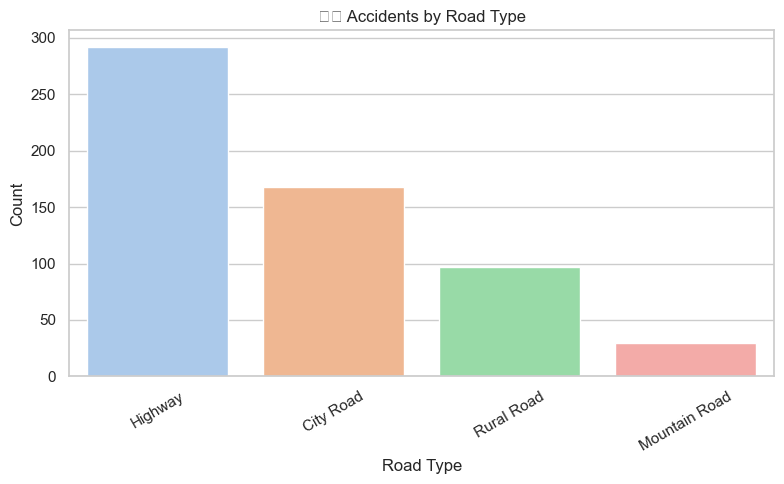

In [164]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Road_Type', order=df['Road_Type'].value_counts().index, palette='pastel')
plt.title("🛣️ Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [165]:
df_majority = df[df.Accident_Severity == 1]
df_minority_0 = df[df.Accident_Severity == 0]
df_minority_2 = df[df.Accident_Severity == 2]

df_minority_0_up = resample(df_minority_0, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_2_up = resample(df_minority_2, replace=True, n_samples=len(df_majority), random_state=42)

df_balanced = pd.concat([df_majority, df_minority_0_up, df_minority_2_up])
print("✅ After balancing:")
print(df_balanced["Accident_Severity"].value_counts())


✅ After balancing:
Accident_Severity
1    175
0    175
2    175
Name: count, dtype: int64


In [166]:
label_encoders = {}
cat_cols = df_balanced.select_dtypes(include='object').columns

for col in cat_cols:
    le = LabelEncoder()
    df_balanced[col] = le.fit_transform(df_balanced[col])
    label_encoders[col] = le

X = df_balanced.drop("Accident_Severity", axis=1)
y = df_balanced["Accident_Severity"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [167]:
log_model = LogisticRegression(max_iter=3000, solver='lbfgs')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

log_acc = accuracy_score(y_test, y_pred_log)
print("📌 Logistic Regression Accuracy:", round(log_acc * 100, 2), "%")
print(classification_report(y_test, y_pred_log))


📌 Logistic Regression Accuracy: 31.43 %
              precision    recall  f1-score   support

           0       0.42      0.43      0.42        35
           1       0.23      0.17      0.20        35
           2       0.28      0.34      0.31        35

    accuracy                           0.31       105
   macro avg       0.31      0.31      0.31       105
weighted avg       0.31      0.31      0.31       105



In [168]:
rf_model = RandomForestClassifier(
    n_estimators=600, max_depth=30, min_samples_split=3,
    min_samples_leaf=2, random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
print("🌲 Random Forest Accuracy:", round(rf_acc * 100, 2), "%")
print(classification_report(y_test, y_pred_rf))


🌲 Random Forest Accuracy: 66.67 %
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        35
           1       0.52      0.49      0.50        35
           2       0.79      0.86      0.82        35

    accuracy                           0.67       105
   macro avg       0.66      0.67      0.66       105
weighted avg       0.66      0.67      0.66       105



In [169]:
xgb_model = XGBClassifier(
    n_estimators=400, learning_rate=0.1, max_depth=6,
    subsample=0.9, colsample_bytree=0.9,
    use_label_encoder=False, eval_metric='mlogloss', random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

xgb_acc = accuracy_score(y_test, y_pred_xgb)
print("⚡ XGBoost Accuracy:", round(xgb_acc * 100, 2), "%")
print(classification_report(y_test, y_pred_xgb))


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:09:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


⚡ XGBoost Accuracy: 70.48 %
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        35
           1       0.57      0.60      0.58        35
           2       0.82      0.89      0.85        35

    accuracy                           0.70       105
   macro avg       0.71      0.70      0.70       105
weighted avg       0.71      0.70      0.70       105



In [170]:
print("📌 Final Accuracy Summary:")
print("-----------------------------")
print("1️⃣ Logistic Regression:", round(log_acc * 100, 2), "%")
print("2️⃣ Random Forest:       ", round(rf_acc * 100, 2), "%")
print("3️⃣ XGBoost:             ", round(xgb_acc * 100, 2), "%")

best = max(
    [("Logistic Regression", log_acc), ("Random Forest", rf_acc), ("XGBoost", xgb_acc)],
    key=lambda x: x[1]
)[0]

print("\n🏆 Best Performing Model:", best)


📌 Final Accuracy Summary:
-----------------------------
1️⃣ Logistic Regression: 31.43 %
2️⃣ Random Forest:        66.67 %
3️⃣ XGBoost:              70.48 %

🏆 Best Performing Model: XGBoost
